In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
from pathlib import Path

In [3]:
root_dir = Path("/Users/yufengluo/Research/anl/su24/trainings/workflow")

In [4]:
pos_dir = root_dir / "collected_positions"
img_dir = root_dir / "collected_imgs"

In [5]:
# with open(pos_dir / "positions_at_2024-07-17_23:43:46.302438.txt", "r") as f:
#     pos = np.array([l.strip().split(",") for l in f.readlines()], dtype=float)

In [6]:
len(os.listdir(pos_dir))

20

In [7]:
fnames = [f.stem for f in pos_dir.glob("*.txt")]
datetimes = pd.to_datetime([f.split("_at_")[1] for f in fnames], format="%Y-%m-%d_%H:%M:%S.%f")
idx = np.argsort(datetimes)
fnames = [fnames[i] for i in idx]

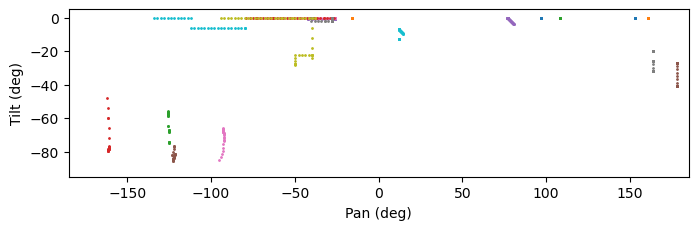

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlim([-185, 185])
ax.set_ylim([-95, 5])
ax.set_xlabel("Pan (deg)")
ax.set_ylabel("Tilt (deg)")
ax.set_aspect("equal")
for fn in fnames:
    with open(pos_dir / f"{fn}.txt", "r") as f:
        pos = np.array([l.strip().split(",") for l in f.readlines()], dtype=float)
    ax.scatter(pos[:, 0], pos[:, 1], s=1)

In [9]:
pos = []
for fn in fnames:
    with open(pos_dir / f"{fn}.txt", "r") as f:
        pos.append(np.array([l.strip().split(",") for l in f.readlines()], dtype=float))
pos = np.vstack(pos)

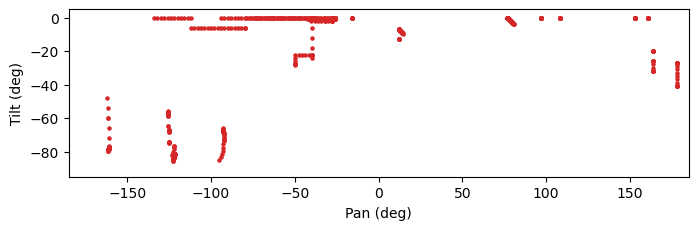

In [10]:
import matplotlib.animation as animation

pos = []
for fn in fnames:
    with open(pos_dir / f"{fn}.txt", "r") as f:
        pos.append(np.array([l.strip().split(",") for l in f.readlines()], dtype=float))
pos = np.vstack(pos)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlim([-185, 185])
ax.set_ylim([-95, 5])
ax.set_xlabel("Pan (deg)")
ax.set_ylabel("Tilt (deg)")
ax.set_aspect("equal")
scat = ax.scatter(pos[0, 0], pos[0, 1], s=5, c='tab:red')


def animate(i):
    # if i < 5:
    #     for j in range(i-1):
    #         scat.plot(pos[j, 0], pos[j, 1], s=5)
    # else:
    # scat.set_offsets((pos[i, 0], pos[i, 1]))
    # for j in range(max(i-5, 0), i):
    # # if i > 0:
    ax.scatter(pos[i, 0], pos[i, 1], s=5, c='tab:red')
    return scat,

# def update(frame):
#     global positions
#     positions += velocities  # Update positions
#     lo = 0 if frame < 10 else frame - 10
#     for i in range(lo, frame):
#         scat.set_offsets(positions[i])
#     # Update the trails
#     for i in range(num_points):
#         trails[i].append(positions[i].copy())
#         if len(trails[i]) > 10:  # Limit trail length
#             trails[i].pop(0)

#     # Update the scatter plot
#     scatter.set_offsets(positions)

#     # Draw the trails
#     for trail in trails:
#         if len(trail) > 1:
#             trail_array = np.array(trail)
#             ax.plot(trail_array[:, 0], trail_array[:, 1], 'b-', alpha=0.5)

#     return scatter,


ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=len(pos) - 1, interval=20)
# plt.show()
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

In [11]:
pos.shape

(620, 3)

In [21]:
pos = []
for fn in fnames:
    with open(pos_dir / f"{fn}.txt", "r") as f:
        pos.append(np.array([l.strip().split(",") for l in f.readlines()], dtype=float))
pos = np.stack(pos)

In [22]:
pos.shape

(20, 31, 3)

In [13]:
diff = pos[:, 1:] - pos[:, :-1]

In [14]:
dist = np.sqrt(diff[:, :, 0]**2 + diff[:, :, 1]**2)

In [15]:
dist.mean()

0.7643989045714001

In [16]:
pan_action = diff[:, :, 0]
tilt_action = diff[:, :, 1]
zoom_action = diff[:, :, 2]

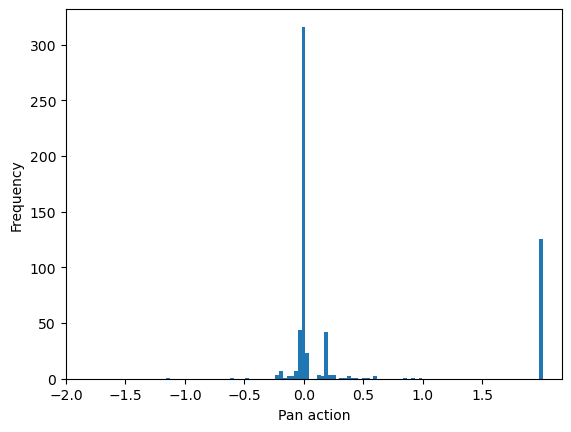

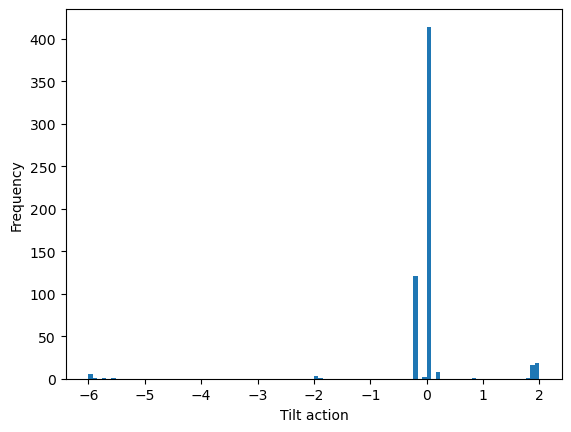

In [17]:
plt.hist(pan_action[pan_action < 4].flatten(), bins=100)
plt.xticks(np.arange(-2, 2, 0.5))
plt.xlabel("Pan action")
plt.ylabel("Frequency")
plt.show()

plt.hist(tilt_action[(tilt_action < 4)].flatten(), bins=100)
# plt.xticks(np.arange(-2, 2, 0.5))
plt.xlabel("Tilt action")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Count')

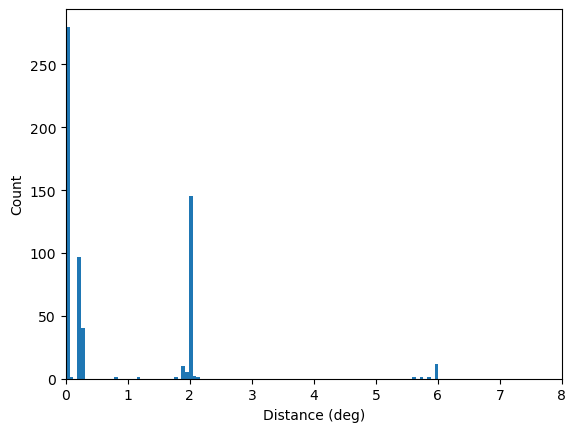

In [18]:
plt.hist(dist[dist < 10].flatten(), bins=100)
plt.xlim([0, 8])
plt.xlabel("Distance (deg)")
plt.ylabel("Count")